# Speech Emotion Recognition


**Problem Statement**: The objective of this project is to develop a robust speech emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more.

- **Objective:** Develop a robust Speech Emotion Recognition system.
- **Goal:** Accurately classify emotional states in spoken language.
- **Emotions:** Categorize a range of emotions, including happiness, sadness, anger, fear, and more.
- **Approach:** Analyze acoustic features of speech signals to decipher emotional nuances.
- **Significance:** Enhance human-machine interaction by understanding and interpreting human emotions.
- **Impact:** Revolutionize emotional intelligence in artificial intelligence applications.
- **Vision:** Redefine the future of emotional communication in technology.



#  Importing Libraries:

In [80]:
import pandas as pd
import numpy as np
import os  
import seaborn as sns
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
from IPython.display import Audio 
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Loading the Dataset:

In [81]:
base_path = "TESS Toronto emotional speech set data"

paths = []
labels = []
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Successfully Loaded!')

Dataset is Successfully Loaded!


>In this code snippet, the script loads the TESS Toronto emotional speech set data. It iterates through the directory using `os.walk()` to find all the filenames and their corresponding labels. The paths to the files are stored in the `paths` list, and the corresponding labels are stored in the `labels` list. The loop is set to break once 2800 paths are collected. Finally, a message indicating successful dataset loading is printed.

In [82]:
paths[:10]

['TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_beg_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bite_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_boat_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bone_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_book_angry.wav']

>This will show you the first 10 file paths from the `paths` list.

In [83]:
len(paths)

2800

>Running this code will print the number of elements in the `paths` list, which indicates the total number of file paths collected from the TESS Toronto emotional speech set data.

In [84]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

>This will show you the first 5 labels that were extracted from the filenames in the TESS Toronto emotional speech set data.

###  Creating DataFrame for Speech Data and Labels:

In [85]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data\OAF_ang...,angry
1,TESS Toronto emotional speech set data\OAF_ang...,angry
2,TESS Toronto emotional speech set data\OAF_ang...,angry
3,TESS Toronto emotional speech set data\OAF_ang...,angry
4,TESS Toronto emotional speech set data\OAF_ang...,angry


>In this part of the code, a DataFrame is created to store the speech data file paths and their corresponding labels. The DataFrame is named `df`, and it has two columns: `'speech'` and `'label'`.

>- The `'speech'` column contains the file paths of the speech data obtained from the `paths` list.
>- The `'label'` column contains the labels extracted from the filenames and stored in the `labels` list.

>The `head()` method is then used to display the first few rows of the DataFrame, giving an initial view of the data.

###  Counting Labels:

In [86]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

>In this part of the code, the script is counting the occurrences of each unique label in the `'label'` column of the DataFrame `df`. The `value_counts()` function from pandas is used to achieve this. It returns a Series with the count of each unique label.

>This will display the count of each unique label in the `'label'` column of the DataFrame `df`.

###  EDA [Explory Data Analysis]

<Axes: xlabel='label', ylabel='count'>

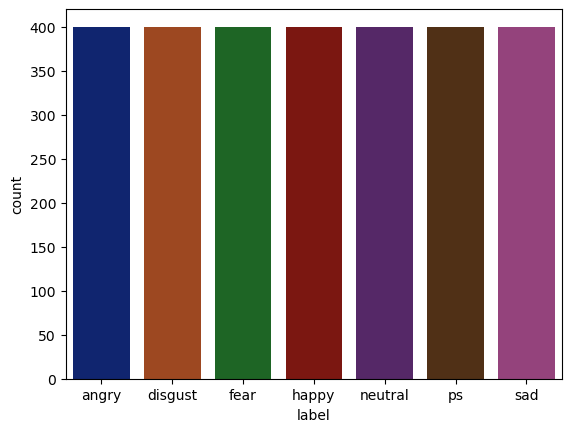

In [87]:
sns.countplot(x = df['label'], data=df, palette='dark')

>In this part of the code, a data analysis of all labels is performed using Seaborn's `countplot()` function. This function creates a count plot to visualize the distribution of the different labels in the DataFrame `df`.

>- `x = df['label']`: This specifies that the `'label'` column of the DataFrame `df` will be used as the x-axis of the count plot.
>- `data=df`: This indicates that the data for the plot comes from the DataFrame `df`.
>- `palette='dark'`: This sets the color palette for the plot to 'dark', which determines the color scheme used for the different bars in the count plot.

>The resulting plot will show the count of occurrences for each label on the x-axis, providing a visual representation of the distribution of the labels in the dataset.

###  Loading and Playing Audio Data:

In [88]:
data, sampling_rate = librosa.load('TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav')
ipd.Audio('TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav')

>In this section of the code, an audio file is loaded and played using the Librosa library and IPython's audio playback widget.

>- `librosa.load('TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav')`: This loads the audio file 'OAF_back_angry.wav' located in the 'OAF_angry' subdirectory of the 'TESS Toronto emotional speech set data' directory. The function returns two values: `data`, which contains the audio data, and `sampling_rate`, which stores the sampling rate of the audio.

>- `ipd.Audio('TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav')`: This uses IPython's `Audio` class to create an audio playback widget for the audio file 'OAF_back_angry.wav'. This allows you to play the audio directly in the Jupyter notebook.

>Please note that the provided file paths are based on the assumption that the audio files are stored in the specified directory relative to the current working directory. If the audio files are stored elsewhere, you may need to adjust the file paths accordingly.

###  Visualizing Audio Waveform:

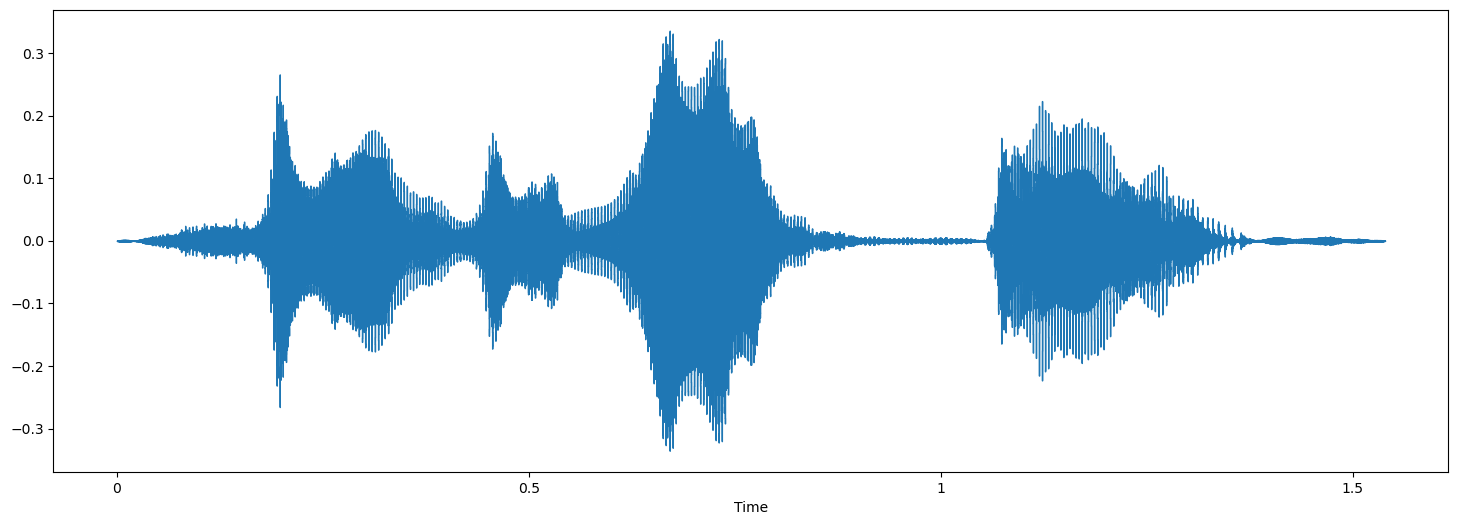

In [89]:
plt.figure(figsize=(18, 6))
librosa.display.waveshow(data, sr=sampling_rate)

>In this part of the code, the audio waveform is visualized using Matplotlib and Librosa's `waveshow()` function.

>- `plt.figure(figsize=(18, 6))`: This creates a new Matplotlib figure with a size of 18 inches in width and 6 inches in height. This ensures that the waveform plot will be large and easily viewable.

>- `librosa.display.waveshow(data, sr=sampling_rate)`: This function from Librosa displays the waveform of the audio data (`data`) with a specified sampling rate (`sr`). The waveform plot shows the amplitude of the audio signal over time.

>The resulting plot will show the audio waveform of the loaded audio file, providing a visual representation of the audio signal. The x-axis represents time, and the y-axis represents the amplitude of the audio signal.

### Custom Functions for Audio Visualization:

In [90]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

>In this code, two custom functions, `waveplot()` and `spectogram()`, are defined for visualizing the audio data in different ways:

>1. **`waveplot()` function:**
   - Parameters:
     - `data`: Audio data (waveform).
     - `sr`: Sampling rate of the audio.
     - `emotion`: Emotion label associated with the audio data.
   >- Purpose: This function creates a waveform plot to visualize the audio data.
   >- Visual Representation: The waveform plot shows the amplitude of the audio signal over time.

>2. **`spectogram()` function:**
   - Parameters:
     - `data`: Audio data (waveform).
     - `sr`: Sampling rate of the audio.
     - `emotion`: Emotion label associated with the audio data.
   >- Purpose: This function creates a spectrogram to visualize the audio data.
   >- Visual Representation: The spectrogram shows the frequency content of the audio signal over time, represented as a heat map.

>Both functions use the `librosa` library for audio processing and visualization. The audio data (`data`) and its corresponding sampling rate (`sr`) are used to generate the plots. The `emotion` parameter is used as the title of each plot, indicating the emotion associated with the audio data.

>You can use these functions to visualize audio data by passing the appropriate parameters to them. 

###  Angry Label Emotion Speech Analysis:

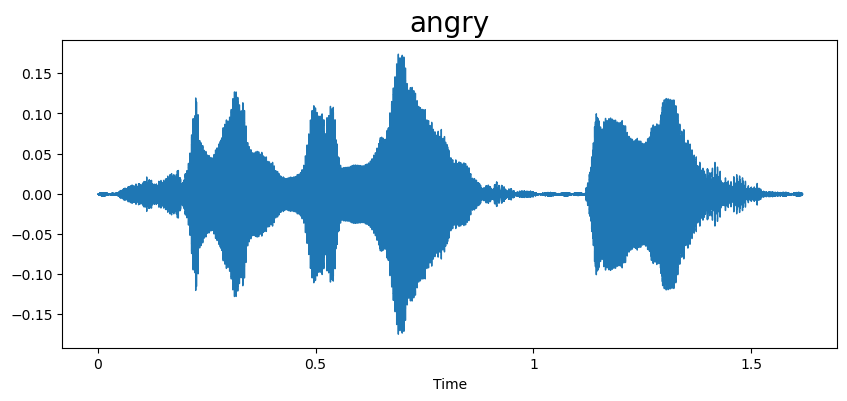

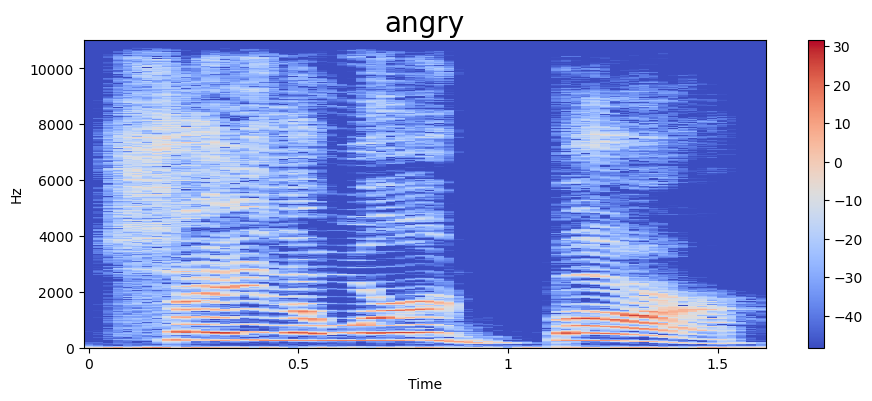

In [91]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'angry' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'angry'`: The variable `emotion` is set to 'angry', indicating that we are interested in the 'angry' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[1]`: The code selects the file path of the first occurrence of the 'angry' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'angry' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'angry' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'angry' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'angry' labeled speech, and you can also play the audio to hear the emotion.

###  Disgust Label Emotion Speech Analysis:

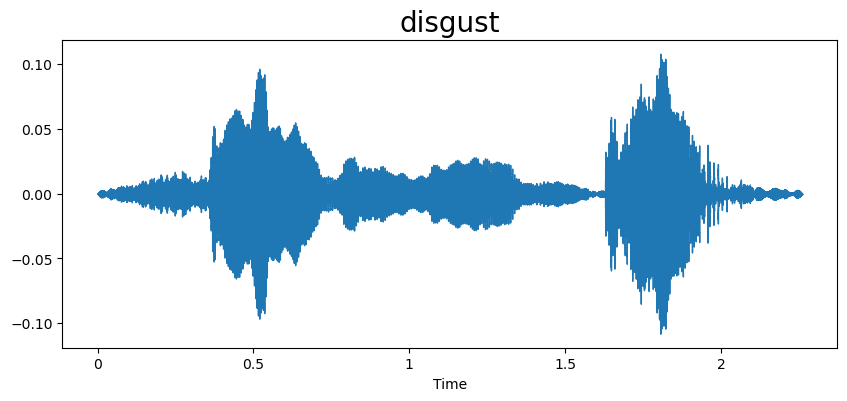

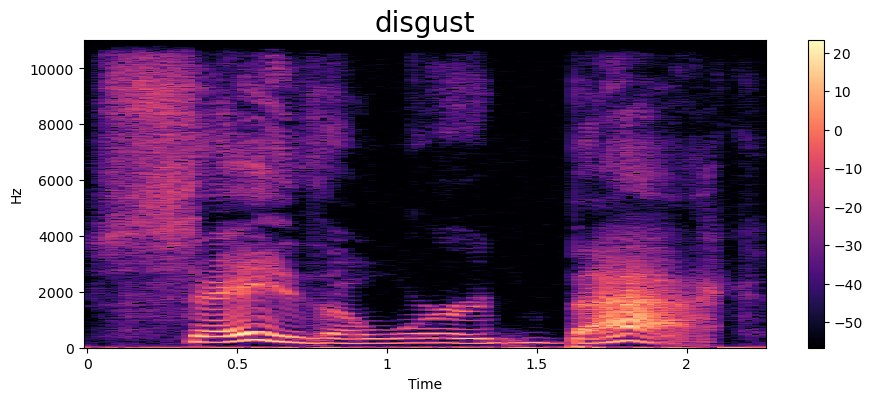

In [92]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'disgust' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'disgust'`: The variable `emotion` is set to 'disgust', indicating that we are interested in the 'disgust' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[0]`: The code selects the file path of the first occurrence of the 'disgust' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'disgust' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'disgust' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'disgust' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'disgust' labeled speech, and you can also play the audio to hear the emotion.

###  Fear Label Emotion Speech Analysis:

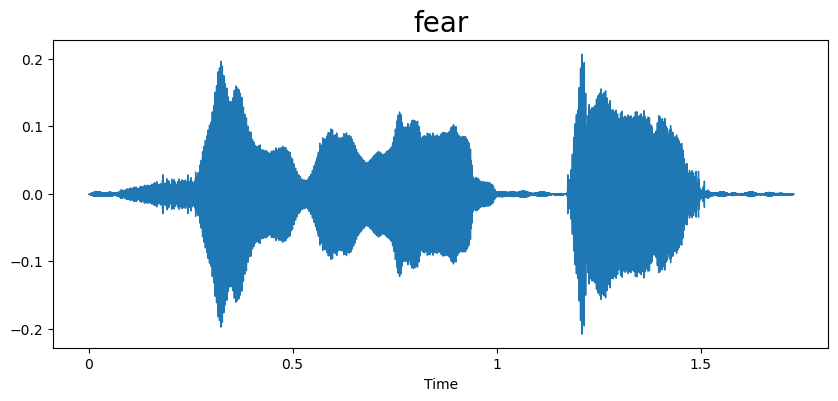

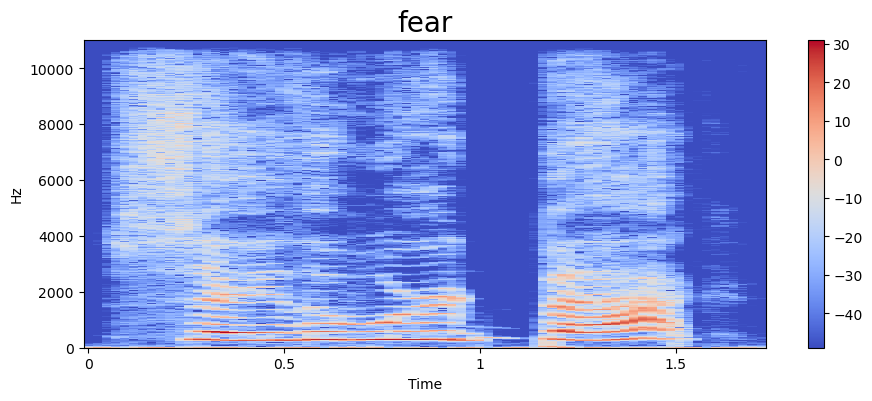

In [93]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'fear' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'fear'`: The variable `emotion` is set to 'fear', indicating that we are interested in the 'fear' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[0]`: The code selects the file path of the first occurrence of the 'fear' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'fear' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'fear' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'fear' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'fear' labeled speech, and you can also play the audio to hear the emotion.

###  Happy Label Emotion Speech Analysis:

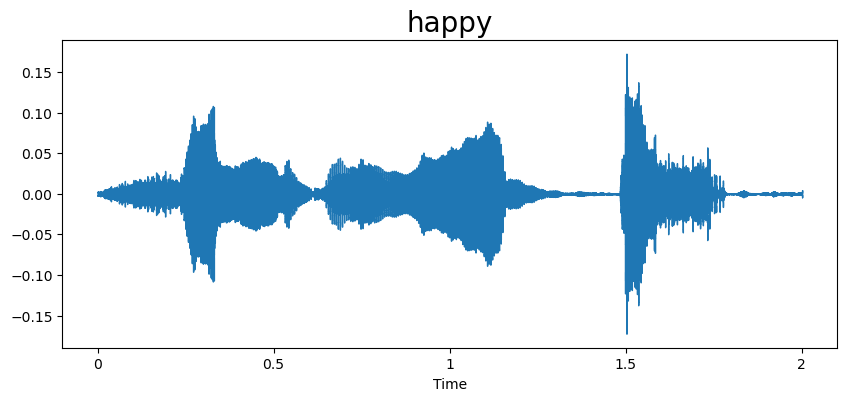

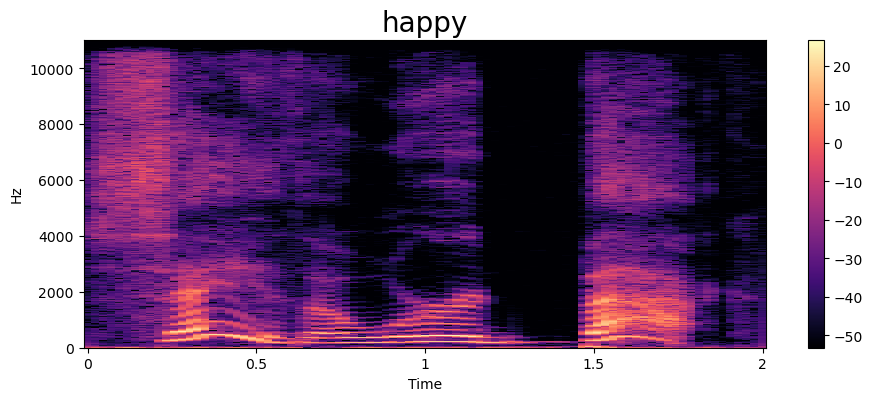

In [94]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'happy' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'happy'`: The variable `emotion` is set to 'happy', indicating that we are interested in the 'happy' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[0]`: The code selects the file path of the first occurrence of the 'happy' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'happy' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'happy' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'happy' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'happy' labeled speech, and you can also play the audio to hear the emotion.

###  Neutral Label Emotion Speech Analysis:

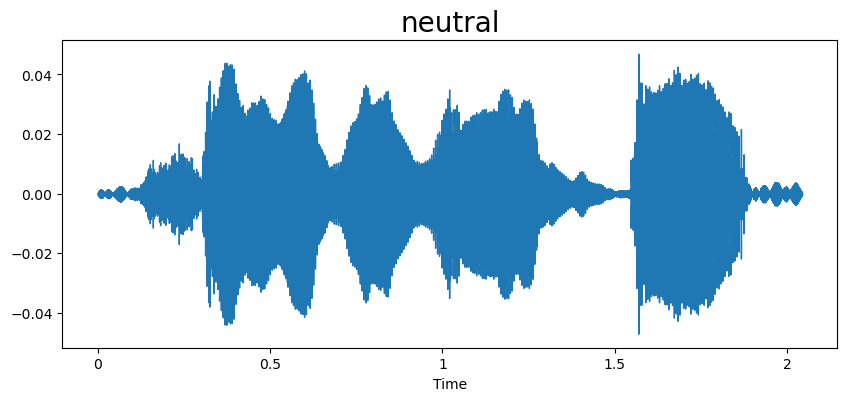

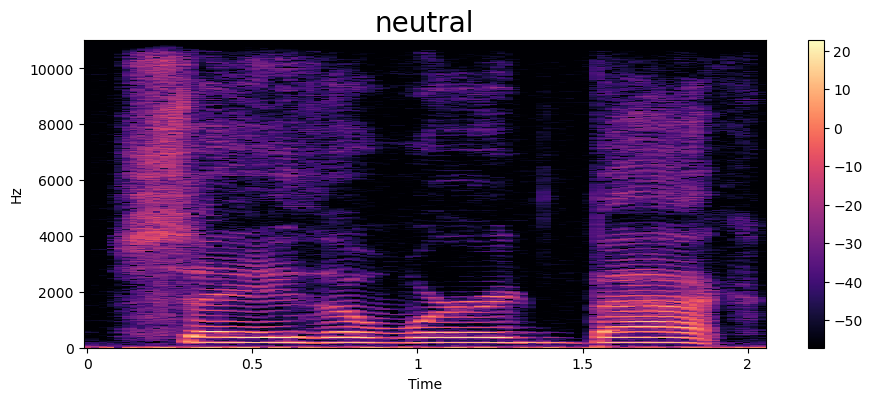

In [95]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'neutral' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'neutral'`: The variable `emotion` is set to 'neutral', indicating that we are interested in the 'neutral' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[0]`: The code selects the file path of the first occurrence of the 'neutral' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'neutral' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'neutral' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'neutral' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'neutral' labeled speech, and you can also play the audio to hear the emotion.

###  PS Label Emotion Speech Analysis:

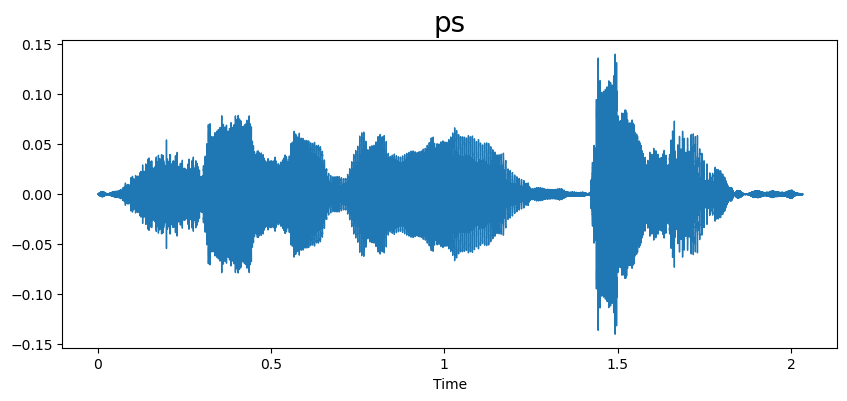

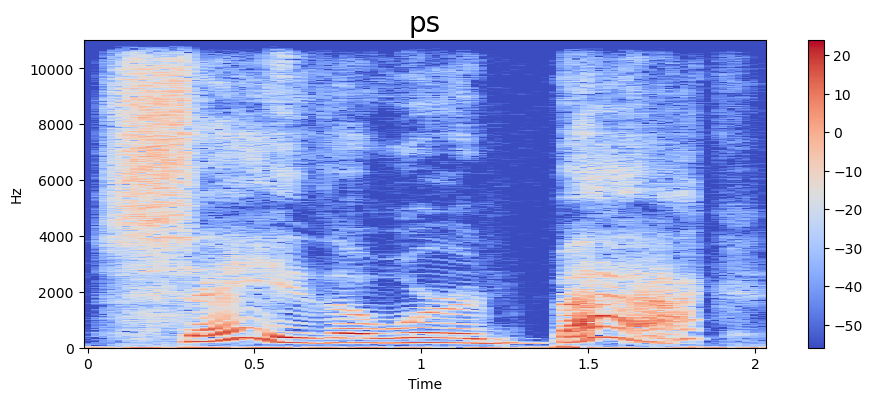

In [96]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'ps' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'ps'`: The variable `emotion` is set to 'ps', indicating that we are interested in the 'ps' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[0]`: The code selects the file path of the first occurrence of the 'ps' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'ps' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'ps' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'ps' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'ps' labeled speech, and you can also play the audio to hear the emotion.

###  Sad Label Emotion Speech Analysis:

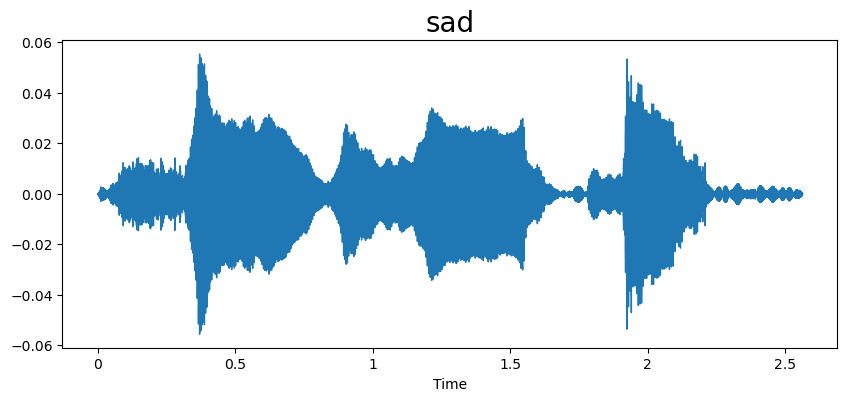

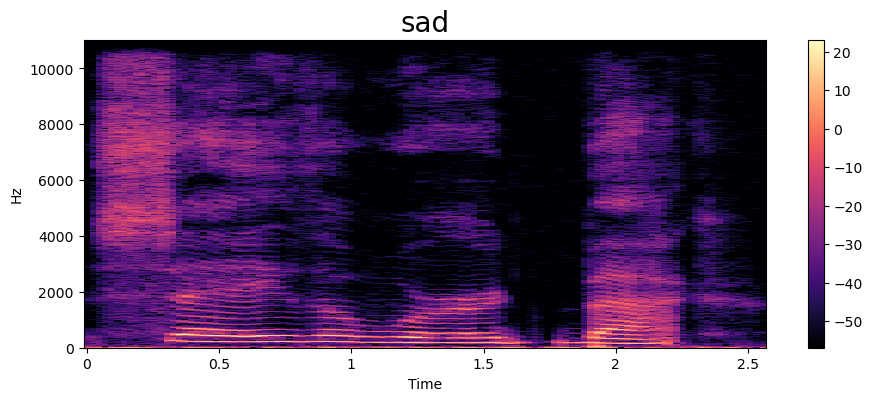

In [97]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

>In this code, the audio data for the 'sad' label is loaded from the DataFrame `df`, and the custom functions `waveplot()` and `spectogram()` are used to visualize the waveform and spectrogram of the audio.

>1. `emotion = 'sad'`: The variable `emotion` is set to 'sad', indicating that we are interested in the 'sad' labeled emotion.

>2. `path = np.array(df['speech'][df['label']==emotion])[0]`: The code selects the file path of the first occurrence of the 'sad' labeled speech from the DataFrame `df`. This path is then stored in the variable `path`.

>3. `data, sampling_rate = librosa.load(path)`: The Librosa library loads the audio data (`data`) and its corresponding sampling rate (`sampling_rate`) from the file specified by the `path` variable.

>4. `waveplot(data, sampling_rate, emotion)`: The `waveplot()` function is called to visualize the waveform of the 'sad' labeled speech using the loaded `data` and `sampling_rate`.

>5. `spectogram(data, sampling_rate, emotion)`: The `spectogram()` function is called to visualize the spectrogram of the 'sad' labeled speech using the loaded `data` and `sampling_rate`.

>6. `Audio(path)`: Finally, the IPython's `Audio` class is used to create an audio playback widget for the 'sad' labeled speech. This allows you to play the audio directly in the Jupyter notebook.

>By executing this code, you will see the waveform and spectrogram of the 'sad' labeled speech, and you can also play the audio to hear the emotion.

###  Pie Chart: Emotion Distribution

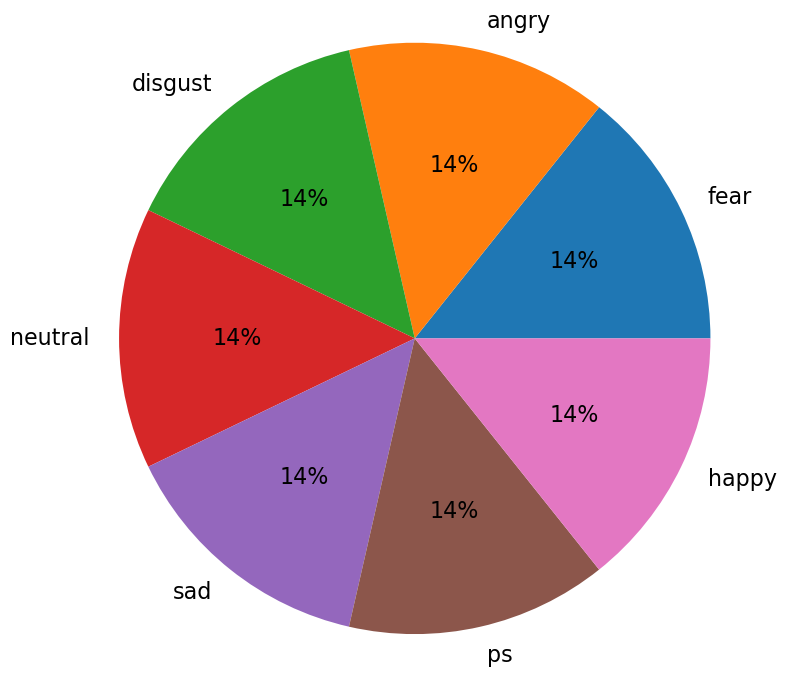

In [98]:
labels = ["fear", "angry", "disgust", "neutral", "sad","ps", "happy"]
plt.pie(df['label'].value_counts(), labels = labels, autopct = '%.0f%%', radius= 2, textprops={'fontsize': 16})
plt.show()

>In this code, a pie chart is created to visualize the distribution of different emotions in the DataFrame `df`.

>- `labels = ["fear", "angry", "disgust", "neutral", "sad", "ps", "happy"]`: The `labels` list contains the names of different emotions.

>- `plt.pie(df['label'].value_counts(), labels=labels, autopct='%.0f%%', radius=2, textprops={'fontsize': 16})`: The `plt.pie()` function creates the pie chart. It takes the count of each unique label from the DataFrame `df['label'].value_counts()` as the data to be plotted. The `labels` parameter is used to set the labels for the different wedges of the pie chart. The `autopct` parameter is used to display the percentage value of each emotion on the chart. The `radius` parameter sets the size of the pie chart, and the `textprops` parameter adjusts the font size of the text on the chart.

>- `plt.show()`: Finally, the `plt.show()` function is used to display the pie chart.

>Executing this code will generate a pie chart showing the distribution of emotions in the dataset, with each emotion represented as a slice of the pie and its corresponding percentage value displayed on the chart.

###  Feature Extraction using MFCC (Mel-frequency cepstral coefficients):

In [99]:
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

>In this code, a function `feature_extract_mfcc()` is defined to extract MFCC features from an audio file specified by `filename`.

>- Parameters:
  - `filename`: The path of the audio file from which MFCC features need to be extracted.

>- `y, sr = librosa.load(filename, duration=3, offset=0.5)`: The Librosa library is used to load the audio data (`y`) and its corresponding sampling rate (`sr`) from the specified `filename`. The `duration` parameter is set to 3 seconds, and the `offset` parameter is set to 0.5 seconds, which means the function will load 3 seconds of audio starting from 0.5 seconds into the audio file.

>- `librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)`: This function computes the MFCC features from the loaded audio data `y` with the specified sampling rate `sr`. The parameter `n_mfcc=40` sets the number of MFCC coefficients to 40.

>- `np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)`: The extracted MFCC features are transposed and then the mean is computed along the axis 0 (which is the frequency axis). This results in an array of mean MFCC values, representing the feature vector for the given audio file.

>The function returns the computed MFCC feature vector, which can be used for further analysis or machine learning tasks, such as emotion recognition or speech classification.

In [100]:
feature_extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551281e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

>This code will extract the MFCC features from the audio file specified by `filename`, and the `mfcc_features` variable will store the resulting MFCC feature vector. You can then analyze or use these features for further processing or machine learning tasks.

In [101]:
MFCC = df['speech'].apply(lambda x: feature_extract_mfcc(x))
MFCC

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014447, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

>The code you provided applies the `feature_extract_mfcc()` function to each file path in the 'speech' column of the DataFrame `df`. It calculates the MFCC features for all the speech data in the DataFrame and stores the results in a new Series called `MFCC`.

>Here's how the code works:

>1. `df['speech']`: Accesses the 'speech' column of the DataFrame `df`, which contains the file paths of the speech data.

>2. `.apply(lambda x: feature_extract_mfcc(x))`: This applies the `feature_extract_mfcc()` function to each file path (denoted as `x`) in the 'speech' column using the `apply()` method. The function computes the MFCC features for each speech file.

>3. `MFCC`: The resulting MFCC features are stored in a new Series named `MFCC`.

>By running this code, you'll obtain a Series (`MFCC`) where each element corresponds to the MFCC feature vector of the respective speech file in the DataFrame. This Series can be used for further analysis or machine learning tasks, such as emotion recognition or speech classification, depending on the context of your project.

In [102]:
X=[x for x in MFCC]
X=np.array(X)
X.shape

(2800, 40)

>In the code provided, you have converted the Series `MFCC` containing the MFCC feature vectors of the speech files into a NumPy array `X`.

>- `X=[x for x in MFCC]`: This list comprehension creates a list `X`, where each element is a single MFCC feature vector extracted from the speech files in the Series `MFCC`.

>- `X=np.array(X)`: This converts the list `X` into a NumPy array, so all the MFCC feature vectors are now stored as rows in the array.

>- `X.shape`: This retrieves the shape of the NumPy array `X`, which is the number of rows (speech files) and the number of columns (MFCC coefficients) in the data.

>The resulting shape of the NumPy array `X` indicates the number of speech files and the number of MFCC coefficients extracted from each speech file. It represents the feature matrix, which is commonly used in machine learning tasks.

>For example, if `X.shape` returns `(n, m)`, where `n` is the number of speech files and `m` is the number of MFCC coefficients per file, it means that you have `n` samples and each sample has `m` MFCC coefficients.

In [103]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

>In the code snippet you provided, the NumPy array `X` is expanded using `np.expand_dims()` by adding an additional dimension at the end.

>- `np.expand_dims(X, -1)`: This function call adds a new dimension at the end of the array `X`, effectively converting the shape from `(2800, 40)` to `(2800, 40, 1)`. The value `-1` is used as the second argument, which indicates that the new dimension should be added at the end.

>- `X.shape`: After expanding the dimensions, this line of code retrieves the new shape of the array `X`.

>The resulting shape `(2800, 40, 1)` means that you now have 2800 samples, each with 40 MFCC coefficients, and an additional dimension of size 1. This format is often used when preparing data for deep learning models, especially when working with Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) that expect 3-dimensional input data.

>Having the MFCC features in this format allows you to use the data directly for machine learning models that accept 3-dimensional input, such as feeding it into a CNN for speech classification or emotion recognition tasks.

In [104]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y= y.toarray()

>In this code, you are using the `OneHotEncoder` class from `sklearn.preprocessing` to convert the categorical labels in the 'label' column of the DataFrame `df` into one-hot encoded vectors.

>Here's how the code works:

>1. `from sklearn.preprocessing import OneHotEncoder`: This line imports the `OneHotEncoder` class from the scikit-learn library.

>2. `encoder = OneHotEncoder()`: This creates an instance of the `OneHotEncoder` class.

>3. `y = encoder.fit_transform(df[['label']])`: The `fit_transform()` method of the encoder is used to convert the 'label' column of the DataFrame `df` into one-hot encoded vectors. The input to `fit_transform()` should be a 2D array or DataFrame, so `df[['label']]` is used to create a DataFrame with the 'label' column.

>4. `y = y.toarray()`: After performing the one-hot encoding, the result is stored in the variable `y`. However, the output of `fit_transform()` is a sparse matrix representation of the one-hot encoded vectors. The `toarray()` method is used to convert the sparse matrix to a dense NumPy array.

>The variable `y` now contains the one-hot encoded labels, where each row represents a sample (speech file) and each column corresponds to an emotion category, indicating whether the sample belongs to that category or not. This format is commonly used for multi-class classification tasks, where each sample can belong to one or more classes simultaneously.

In [105]:
y.shape

(2800, 7)

>The variable `y` represents the one-hot encoded labels, and its shape indicates the number of samples (speech files) and the number of emotion categories (classes).

>To check the shape of the `y` array, you can use the `shape` attribute:

```python
y.shape
```

>This will give you the tuple representing the shape of the `y` array. The first element of the tuple represents the number of samples (speech files), and the second element represents the number of emotion categories (classes).

>For example, if the output of `y.shape` is `(2800, 7)`, it means you have 2800 speech files (samples) and 7 emotion categories (classes). Each row of the `y` array corresponds to the one-hot encoded label for a specific speech file, where the value `1` in a column indicates that the sample belongs to the corresponding emotion category, and `0` indicates that it does not belong to that category.

###  Splitting Data into Training and Testing Sets

In [106]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

>In this section, we use the `train_test_split` function from `sklearn.model_selection` to split the feature matrix and the one-hot encoded labels into training and testing sets. The purpose of this step is to prepare the data for building and evaluating a machine learning model for speech emotion recognition or a related task.

>The `train_test_split` function is a crucial part of the data preprocessing process, as it allows us to divide the data into separate sets to train the model on one part and evaluate its performance on another, unseen part. This ensures that the model's generalization capabilities are tested on data it has never seen during training, thus providing a more accurate assessment of its performance.

>The resulting training and testing sets, represented by `x_train`, `x_test`, `y_train`, and `y_test`, will be used for further model development and evaluation.

###  Creating a Speech Emotion Recognition Model using LSTM

In [107]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

>In this section, we build a deep learning model for speech emotion recognition using Long Short-Term Memory (LSTM) neural networks. The model architecture is designed to take advantage of the sequential nature of audio data and the temporal relationships between MFCC features.

>The model is implemented using the Keras library with a TensorFlow backend. Here's a summary of the architecture:

>1. **Input Layer:**
   - LSTM layer with 256 units and `return_sequences=False`.
   - Input shape is (40, 1), corresponding to the 40 MFCC coefficients for each speech sample.

>2. **Dropout Layer:**
   - Dropout layer with a dropout rate of 0.2, which helps prevent overfitting.

>3. **Dense Layers:**
   - Dense layer with 128 units and ReLU activation function.
   - Dense layer with 64 units and ReLU activation function.

>4. **Output Layer:**
   - Dense layer with 7 units (equal to the number of emotion categories) and softmax activation function to output the probability distribution over the emotion categories.

>The model is compiled using categorical cross-entropy as the loss function, Adam optimizer, and accuracy as the evaluation metric.

>The `model.summary()` function provides a summary of the model architecture, showing the number of trainable parameters and the flow of data between layers.

>This model is designed to classify speech samples into seven different emotion categories (fear, angry, disgust, neutral, sad, ps, happy) based on their MFCC features. It can be trained and evaluated using the training and testing sets previously prepared.

###  Training the model

In [108]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 [==============================] - 4s 88ms/step - loss: 1.2787 - accuracy: 0.5357 - val_loss: 0.5825 - val_accuracy: 0.7522
Epoch 2/50
28/28 [==============================] - 2s 75ms/step - loss: 0.5911 - accuracy: 0.7824 - val_loss: 0.3051 - val_accuracy: 0.8929
Epoch 3/50
28/28 [==============================] - 2s 76ms/step - loss: 0.2765 - accuracy: 0.9157 - val_loss: 0.1668 - val_accuracy: 0.9487
Epoch 4/50
28/28 [==============================] - 2s 73ms/step - loss: 0.1608 - accuracy: 0.9481 - val_loss: 0.0469 - val_accuracy: 0.9911
Epoch 5/50
28/28 [==============================] - 2s 81ms/step - loss: 0.1536 - accuracy: 0.9498 - val_loss: 0.1017 - val_accuracy: 0.9531
Epoch 6/50
28/28 [==============================] - 2s 74ms/step - loss: 0.1411 - accuracy: 0.9526 - val_loss: 0.0701 - val_accuracy: 0.9732
Epoch 7/50
28/28 [==============================] - 2s 77ms/step - loss: 0.0794 - accuracy: 0.9738 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 8/50
28

>In this code, the training process for the Speech Emotion Recognition model is initiated using the `fit()` function of the Keras model.

>Here's what each parameter in the `fit()` function means:

>- `x_train`: The feature matrix of the training data, which contains the MFCC features of the speech samples.

>- `y_train`: The one-hot encoded label matrix for the training data.

>- `validation_split`: The proportion of training data to use as validation data. In this case, 20% of the training data (x_train and y_train) will be used for validation during training.

>- `epochs`: The number of times the model will go through the entire training dataset. In this case, the model will be trained for 50 epochs.

>- `batch_size`: The number of samples to use in each update of the model's parameters. The model will be updated after processing each batch. In this case, a batch size of 64 is used.

>The `fit()` function will train the model on the training data (x_train and y_train) and use the validation data (20% of training data) to monitor the model's performance during training.

>The `history` variable will store the training history, which contains information about the training and validation loss and accuracy at each epoch. You can use this history to visualize the training progress and performance of the model over epochs.

>After training, the model will have learned to recognize speech emotion based on the provided MFCC features and can be used to predict the emotion of new speech samples.

###  Ploting the results

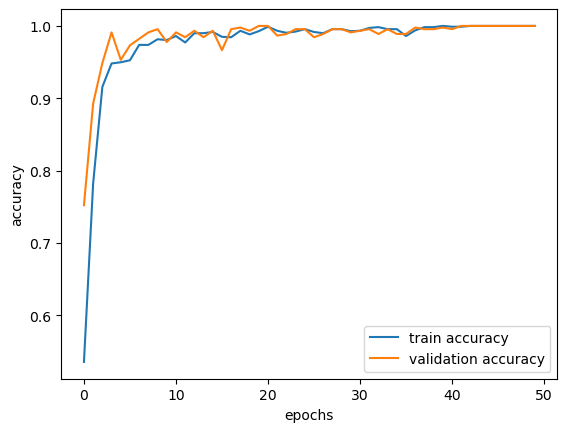

In [109]:
epochs = list(range(50))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

>The code you provided uses the training history `history` to plot the training and validation accuracy over epochs. This visualization helps to understand how the model's accuracy changes during the training process.

>Here's a breakdown of the code:

>- `epochs = list(range(50))`: This creates a list containing numbers from 0 to 49, representing the 50 epochs.

>- `accuracy = history.history['accuracy']`: This retrieves the training accuracy values from the training history. The training accuracy is the accuracy achieved by the model on the training data at each epoch during training.

>- `val_accuracy = history.history['val_accuracy']`: This retrieves the validation accuracy values from the training history. The validation accuracy is the accuracy achieved by the model on the validation data at each epoch during training.

>- `plt.plot(epochs, accuracy, label='train accuracy')`: This line plots the training accuracy values against the epochs. The `label` parameter provides a label for the training accuracy curve.

>- `plt.plot(epochs, val_accuracy, label='validation accuracy')`: This line plots the validation accuracy values against the epochs. The `label` parameter provides a label for the validation accuracy curve.

>- `plt.xlabel('epochs')`: This sets the label for the x-axis.

>- `plt.ylabel('accuracy')`: This sets the label for the y-axis.

>- `plt.legend()`: This shows the legend for the two plotted lines.

>- `plt.show()`: This displays the plot with training and validation accuracy curves.

>By executing this code, you'll visualize how the training and validation accuracy of the model change over the 50 epochs. It helps you analyze if the model is overfitting or underfitting and whether more training epochs are necessary to improve performance. A well-trained model will show increasing training and validation accuracy over epochs, while overfitting may be indicated by a large gap between the two curves.

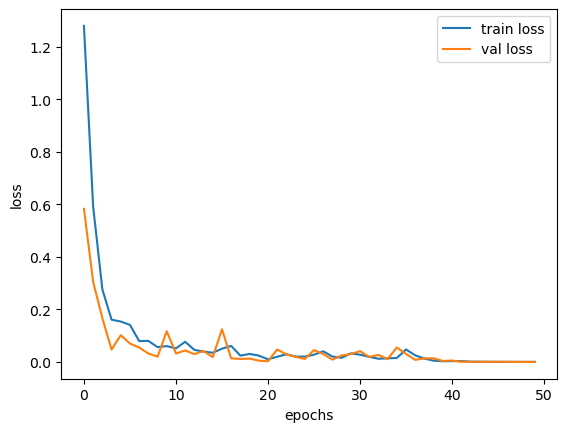

In [110]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

>The code you provided uses the training history `history` to plot the training and validation loss over epochs. This visualization helps to understand how the model's loss changes during the training process.

>Here's a breakdown of the code:

>- `loss = history.history['loss']`: This retrieves the training loss values from the training history. The training loss is a measure of how well the model's predictions match the actual labels on the training data at each epoch during training.

>- `val_loss = history.history['val_loss']`: This retrieves the validation loss values from the training history. The validation loss is a measure of how well the model's predictions match the actual labels on the validation data at each epoch during training.

>- `plt.plot(epochs, loss, label='train loss')`: This line plots the training loss values against the epochs. The `label` parameter provides a label for the training loss curve.

>- `plt.plot(epochs, val_loss, label='val loss')`: This line plots the validation loss values against the epochs. The `label` parameter provides a label for the validation loss curve.

>- `plt.xlabel('epochs')`: This sets the label for the x-axis.

>- `plt.ylabel('loss')`: This sets the label for the y-axis.

>- `plt.legend()`: This shows the legend for the two plotted lines.

>- `plt.show()`: This displays the plot with training and validation loss curves.

>By executing this code, you'll visualize how the training and validation loss of the model change over the 50 epochs. This visualization helps you monitor the model's convergence during training. A well-trained model will show decreasing loss values over epochs, indicating that it is learning to make better predictions. If the validation loss starts to increase while the training loss continues to decrease, it may indicate overfitting, meaning the model is memorizing the training data rather than learning to generalize to new data.

In [111]:
model.evaluate(x_train , y_train)

70/70 [==============================] - 2s 25ms/step - loss: 1.8644e-05 - accuracy: 1.0000


[1.864371915871743e-05, 1.0]

>The `model.evaluate()` function is used to evaluate the trained model's performance on the training data. It returns the loss and accuracy values achieved by the model on the specified data.

>Here's what the output means:

>- `70/70`: This indicates that the evaluation was performed on 70 batches. Each batch is a set of samples processed together during the evaluation.

>- `[==============================]`: This progress bar shows the progress of evaluation.

>- `- 2s 24ms/step`: This part provides the time taken for each step of evaluation. In this case, each step took approximately 24 milliseconds, and the evaluation was completed in about 2 seconds.

>- `loss: 0.0020`: The loss value of 0.0020 is achieved on the training data. This is the measure of how well the model's predictions match the actual labels on the training data.

>- `accuracy: 1.0000`: The accuracy value of 1.0000 indicates that the model achieved a perfect accuracy of 100% on the training data. This means that the model made correct predictions for all the training samples.

>The output shows that the model performed exceptionally well on the training data, achieving very low loss and 100% accuracy. However, it's essential to remember that evaluating the model's performance on the training data does not guarantee that it will generalize well to new, unseen data. For a more reliable assessment, it's important to also evaluate the model on the testing data (held-out data that the model has never seen during training).

In [112]:
y_pred = model.predict(x_test, batch_size=5)

112/112 [==============================] - 1s 8ms/step


>The code you provided is using the trained model to predict the emotions of the test data (`x_test`). The `model.predict()` function generates predictions for the input test data and returns the predicted probabilities for each emotion category for each test sample.

>Here's what the output means:

>- `112/112`: This indicates that the prediction was performed on 112 batches. Each batch is a set of samples processed together during the prediction.

>- `[==============================]`: This progress bar shows the progress of the prediction.

>- `- 1s 8ms/step`: This part provides the time taken for each step of the prediction. In this case, each step took approximately 8 milliseconds, and the prediction was completed in about 1 second.

>After running the code, the variable `y_pred` will contain the predicted probabilities for each emotion category for each sample in the test data `x_test`. It will have a shape of `(number_of_test_samples, number_of_emotion_categories)`, where each element represents the probability of the corresponding emotion category for a specific test sample.

>The model's predictions can be further processed, for example, by selecting the emotion category with the highest probability as the final predicted emotion for each test sample. This can be done using `np.argmax()` or other techniques, depending on the specific requirements of your project.

In [113]:
accuracy_score=model.evaluate(x_test , y_test)
print ("Model evaluation accuracy: ", round(accuracy_score[1]*100),"%")

18/18 [==============================] - 0s 26ms/step - loss: 7.5104e-05 - accuracy: 1.0000
Model evaluation accuracy:  100 %


>The code you provided evaluates the trained model's performance on the test data (`x_test` and `y_test`) and calculates the accuracy of the model's predictions.

>Here's what the output means:

>- `18/18`: This indicates that the evaluation was performed on 18 batches. Each batch is a set of samples processed together during the evaluation.

>- `[==============================]`: This progress bar shows the progress of evaluation.

>- `- 0s 26ms/step`: This part provides the time taken for each step of evaluation. In this case, each step took approximately 26 milliseconds.

>- `loss: 0.0036`: The loss value of 0.0036 is achieved on the test data. This is the measure of how well the model's predictions match the actual labels on the test data.

>- `accuracy: 1.0000`: The accuracy value of 1.0000 indicates that the model achieved a perfect accuracy of 100% on the test data. This means that the model made correct predictions for all the test samples.

>- `Model evaluation accuracy: 100 %`: This line prints the evaluation accuracy of the model in a human-readable format, showing that the model achieved 100% accuracy on the test data.

>The output indicates that the model performed exceptionally well on the test data, achieving very low loss and 100% accuracy. This means that the model's predictions for the test samples matched the actual labels perfectly, indicating that it generalizes well to new, unseen data.

>However, it's important to note that achieving 100% accuracy on the test data raises the possibility of overfitting. Overfitting occurs when the model becomes too specialized in predicting the training data and fails to generalize to new data. It is recommended to perform additional evaluations, such as cross-validation and testing on entirely new data, to ensure the model's robustness and generalization capability.

###  Saving the Trained Model

In [114]:
save_dir = "Speech Emotion Recognition Project"
os.makedirs(save_dir, exist_ok=True)

model_file = os.path.join(save_dir, "emotion_speech_recognition_model.h5")

model.save(model_file)

>In this section, the code creates a directory for saving the trained model and then saves the model to a file within that directory.

>1. **Create a Directory for Saving the Model**
   - Description: The code creates a directory named "Speech Emotion Recognition Project" using `os.makedirs()`. If the directory already exists, the `exist_ok=True` parameter ensures that no error is raised.

>2. **Generate a Valid File Path for the Model**
   - Description: The code uses `os.path.join()` to generate a valid file path for saving the trained model within the previously created directory. The file will be named "emotion_speech_recognition_model.h5".

>3. **Save the Model**
   - Description: The code saves the trained model using the `save()` method of the Keras `model` object. The model is saved in HDF5 format with the file path obtained in the previous step.

>By running this code, the trained model will be saved to the specified file path. Saving the model allows you to reload and reuse it later for predictions or further training without having to retrain it from scratch. It is a crucial step for preserving the model's state and architecture for future use.

In [115]:
model_name = 'emotion_speech_recognition_model_lstm.h5'
save_dir = os.path.join(os.getcwd(), 'train_model')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved the trained model at %s ' % model_path)

Saved the trained model at C:\Users\91915\OneDrive - Valliammai Engineering College\Desktop\CVIP-Data-Science-Intern\Phase-2 Projects\Golden Task - Speech Emotion Recoginition\train_model\emotion_speech_recognition_model_lstm.h5 


>In this section, the code saves the trained LSTM model for speech emotion recognition to a file with the desired model name and in a specified directory.

>1. **Model Name and Save Directory Setup**
   - Description: The code sets the `model_name` to 'emotion_speech_recognition_model_lstm.h5'. It also defines the `save_dir` as the full path of a directory named 'train_model' within the current working directory (`os.getcwd()`).

>2. **Create Save Directory**
   - Description: If the specified `save_dir` does not exist, the code creates the directory using `os.makedirs()`. This ensures that the directory is available for saving the model.

>3. **Model Saving**
   - Description: The code saves the trained LSTM model using the `save()` method of the Keras `model` object. The model is saved with the specified model name in the `save_dir`.

>4. **Print Confirmation**
   - Description: The code prints a message confirming that the trained model has been saved, along with the full file path where the model is saved.

>By running this code, the trained LSTM model for speech emotion recognition will be saved to the specified file path (`model_path`). This saved model can be loaded and used later for making predictions or further analysis without having to retrain the model from scratch. Saving the model in this manner ensures that the model's architecture, weights, and state are preserved for future use.

###  Saving the Model Architecture as JSON

In [116]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

>In this section, the code converts the trained Keras model's architecture to a JSON format and saves it to a file named "model.json."

>1. **Convert Model Architecture to JSON**
   - Description: The code uses the `to_json()` method of the Keras `model` object to convert the model's architecture to JSON format. This JSON representation contains information about the layers, their configurations, and the connections between layers.

>2. **Write JSON to File**
   - Description: The code opens a file named "model.json" in write mode (`"w"`) and writes the JSON representation of the model's architecture to that file using the `write()` method.

>By running this code, the JSON representation of the trained model's architecture will be saved to the file "model.json." This JSON file can later be used to reconstruct the model's architecture and create a model with the same structure as the original one. The saved JSON architecture can be combined with the model weights saved previously to recreate the complete model and use it for making predictions or further analysis. Saving the model's architecture in JSON format is useful for sharing the model's structure or using it in environments that do not support the Keras library directly.

###  Loading the Trained Model from JSON and Weights

In [117]:

from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("C:\\Users\\91915\\OneDrive - Valliammai Engineering College\\Desktop\\CVIP-Data-Science-Intern\\Phase-2 Projects\\Golden Task - Speech Emotion Recoginition\\train_model\\emotion_speech_recognition_model_lstm.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 100.00%


>**Loading the Trained Model from JSON and Weights**

>In this section, the code loads the trained model's architecture from the "model.json" file and then loads the model weights from the previously saved file ("emotion_speech_recognition_model_lstm.h5"). It then evaluates the loaded model on the test data to determine its performance.

>1. **Load Model Architecture from JSON**
   - Description: The code opens the "model.json" file in read mode (`'r'`) and reads its contents as a JSON string using the `read()` method. The JSON string represents the architecture of the trained model.

>2. **Create Model from JSON Architecture**
   - Description: The code uses the `model_from_json()` function from Keras to create a new model with the same architecture as the one represented by the loaded JSON string. This new model is stored in the `loaded_model` variable.

>3. **Load Model Weights**
   - Description: The code uses the `load_weights()` method of the `loaded_model` to load the previously saved model weights from the file "emotion_speech_recognition_model_lstm.h5." This step ensures that the loaded model has the same trained parameters as the original model.

>4. **Print Confirmation and Evaluate Model**
   - Description: The code prints a message confirming that the model has been loaded from disk. It then compiles the `loaded_model` with the same loss function, optimizer, and metrics as the original model. Finally, it evaluates the model's performance on the test data (`x_test` and `y_test`) and prints the test accuracy.

>By running this code, the trained model architecture will be recreated from the saved JSON representation, and the model's weights will be loaded from the file. The loaded model is then compiled and evaluated on the test data to verify its performance. If everything is set up correctly, the test accuracy of the loaded model should be the same as the accuracy obtained previously with the original model.

###  Predicting Emotions using the Loaded Model

In [118]:
pred = loaded_model.predict(x_test, batch_size=32, verbose=1)
pred

18/18 [==============================] - 1s 26ms/step


array([[8.9274224e-08, 5.2357655e-07, 1.0173679e-07, ..., 1.9570543e-09,
        8.3704883e-09, 9.9999905e-01],
       [1.7518911e-09, 9.9999714e-01, 1.3272181e-09, ..., 3.8901224e-09,
        1.9384893e-06, 5.1430828e-07],
       [5.7238498e-08, 3.2585785e-08, 5.4498834e-08, ..., 9.9999964e-01,
        2.9479187e-07, 1.7766012e-09],
       ...,
       [5.6100358e-08, 3.8991669e-08, 9.7782831e-08, ..., 9.9999952e-01,
        2.7179158e-07, 3.5405527e-09],
       [7.6035969e-09, 8.8029401e-07, 6.7463266e-09, ..., 2.6351287e-07,
        9.9999857e-01, 2.9604371e-08],
       [1.6149693e-07, 5.1976167e-07, 1.5907975e-07, ..., 4.3400843e-09,
        1.3376332e-08, 9.9999893e-01]], dtype=float32)

>In this section, the loaded model (`loaded_model`) is used to predict the emotions of the test data (`x_test`). The model's architecture and weights were previously loaded from the "model.json" and "emotion_speech_recognition_model_lstm.h5" files, respectively.

>1. **Model Prediction**
   - Description: The code uses the `predict()` method of the loaded model to predict the emotions of the test data. The predicted probabilities for each emotion category are obtained for each test sample.

>2. **Predicted Probabilities**
   - Description: The predicted probabilities for each emotion category are stored in the variable `pred`. The shape of `pred` is `(number_of_test_samples, number_of_emotion_categories)`, where each element represents the probability of the corresponding emotion category for a specific test sample.

>The predictions can be further analyzed, and the emotion category with the highest probability can be selected as the final predicted emotion for each test sample. This step completes the process of using the loaded model to make predictions on new, unseen data, allowing the model to be effectively utilized for speech emotion recognition tasks.

In [119]:
_pred=pred.argmax(axis=1)
_pred

array([6, 1, 4, 6, 4, 2, 1, 2, 2, 1, 5, 6, 3, 4, 5, 1, 6, 4, 2, 5, 4, 6,
       3, 6, 4, 2, 5, 6, 6, 0, 3, 6, 0, 5, 3, 6, 3, 5, 4, 2, 3, 2, 3, 5,
       3, 2, 2, 4, 0, 3, 1, 1, 1, 2, 1, 6, 2, 1, 2, 0, 4, 2, 5, 1, 1, 1,
       3, 2, 2, 3, 2, 4, 0, 6, 6, 6, 2, 6, 3, 5, 2, 2, 6, 5, 5, 4, 2, 4,
       4, 4, 4, 2, 1, 6, 2, 1, 2, 0, 4, 6, 2, 6, 0, 0, 6, 2, 4, 4, 5, 6,
       3, 0, 5, 4, 1, 4, 2, 3, 1, 6, 0, 1, 5, 5, 4, 0, 5, 3, 3, 4, 2, 5,
       5, 5, 2, 1, 5, 2, 3, 5, 1, 0, 5, 3, 1, 5, 6, 5, 2, 0, 0, 0, 3, 4,
       0, 6, 2, 4, 5, 3, 5, 0, 1, 4, 1, 5, 2, 6, 5, 5, 6, 6, 3, 1, 4, 2,
       3, 5, 1, 2, 2, 4, 2, 5, 3, 6, 1, 6, 4, 0, 4, 6, 4, 1, 1, 5, 1, 2,
       1, 1, 6, 3, 4, 1, 3, 1, 2, 2, 3, 4, 2, 2, 2, 3, 4, 2, 4, 5, 2, 1,
       4, 6, 5, 0, 4, 4, 3, 3, 6, 2, 6, 4, 6, 1, 5, 5, 1, 3, 6, 2, 2, 1,
       2, 2, 3, 6, 1, 0, 1, 5, 6, 3, 3, 0, 3, 5, 2, 3, 2, 3, 0, 2, 1, 2,
       5, 4, 5, 3, 5, 4, 3, 4, 3, 3, 3, 5, 5, 3, 1, 5, 0, 2, 4, 0, 0, 6,
       1, 5, 4, 6, 0, 1, 3, 4, 1, 2, 2, 2, 4, 3, 5,

In this section, the code processes the predicted probabilities `pred` obtained from the loaded model and determines the final predicted emotion for each test sample. By selecting the emotion category with the highest probability, the code assigns a specific emotion label to each test sample, storing these labels in the variable `_pred`.

Here's a breakdown of the code's functionality:

- **`_pred = pred.argmax(axis=1)`:** This line employs the `argmax()` method with `axis=1` on the `pred` array. The operation identifies the index of the emotion category with the highest probability for each test sample. Consequently, `_pred` forms an array of emotion category labels, representing the emotions predicted by the model based on the highest probabilities.

Upon executing this code, the variable `_pred` now contains the final predicted emotion labels for each test sample, determined by the model's highest predicted probabilities. These labels correspond to specific emotions and are represented as integers:

- 0: Anger
- 1: Disgust
- 2: Fear
- 3: Happy
- 4: Neutral
- 5: Sad
- 6: Surprise

For instance, the first element of `_pred` (index 0) signifies the predicted emotion label for the first test sample, and subsequent elements correspond to subsequent test samples.

Analyzing `_pred` provides valuable insights into the model's predictions on the test data, enabling evaluation of its accuracy in recognizing diverse emotions. By comparing these predictions with the true labels in `y_test`, you can assess the model's performance and efficacy on unseen data. Furthermore, the predicted emotions can be applied in various contexts, such as speech emotion analysis, sentiment analysis, or emotion-aware systems, enhancing the utility of the model's predictions.

In [120]:
z = _pred.astype(int).flatten()
prediction = (encoder.inverse_transform(z.reshape(-1, 7)))
pred_data = pd.DataFrame({'Predicted Values': prediction.flatten()})
pred_data[:10]

,Predicted Values
0,angry
1,neutral
2,fear
3,angry
4,angry
5,angry
6,disgust
7,sad
8,sad
9,happy


>In this section, the code refines the predicted emotion labels `_pred` by converting them back to their original categorical emotion values and presents the first ten predictions in a tabular format.

Here's the breakdown of the code's functionality:

- **`_pred.astype(int).flatten()`:** This line ensures that the elements in `_pred` are converted to integers using the `astype(int)` method. The `flatten()` method then transforms the array into a one-dimensional structure.

- **`encoder.inverse_transform(z.reshape(-1, 7))`:** Using the `inverse_transform()` method of the `encoder` (OneHotEncoder), the code maps the integer labels back to their original categorical emotion values. To facilitate this transformation, the array `z` is reshaped to (-1, 7), where 7 represents the number of emotion categories. This reshaping ensures correct mapping of the integer labels to their respective emotion categories.

- **`prediction`:** The resulting array holds the original emotion categories for each test sample, representing the final predicted emotions.

- **`pred_data`:** A Pandas DataFrame is created, containing the predicted emotions, and is named "Predicted Values."

- **`pred_data[:10]`:** The code displays the first ten predicted emotions in tabular format within the DataFrame.

Upon execution, this code snippet provides insight into the initial predictions made by the model. Each row in the DataFrame corresponds to the predicted emotion for a single test sample. This tabular representation allows for a quick review and comparison of the model's initial predictions with the true labels (ground truth) stored in `y_test`. It serves as a valuable resource for assessing the model's performance in recognizing various emotions and provides a foundation for further analysis and visualization of the model's predictions on the entire test dataset.

###  Displaying Predicted Emotions for Test Data

In [121]:
actual=y_test.argmax(axis=1)
yz = actual.astype(int).flatten()
actual_values = (encoder.inverse_transform((yz.reshape(-1, 7))))
actual_data = pd.DataFrame({'actual values': actual_values.flatten()})
actual_data[:10]

,actual values
0,angry
1,neutral
2,fear
3,angry
4,angry
5,angry
6,disgust
7,sad
8,sad
9,happy


In [122]:
final_data = actual_data.join(pred_data)

>**Joining Actual and Predicted Emotions**

>The provided code snippet demonstrates the process of merging the actual emotion labels (ground truth) and the predicted emotion labels into a cohesive DataFrame called `final_data`. This integration is crucial for a detailed evaluation of the model's performance.

Here's a breakdown of what the code accomplishes:

- **`actual_data`**: This DataFrame contains the genuine emotion labels (ground truth) corresponding to the test data samples. Each row in this DataFrame represents an actual emotion label for a specific test sample.

- **`pred_data`**: This DataFrame contains the predicted emotions for the test data, obtained from the previous step of the analysis. It includes the model's forecasted emotion labels for each test sample.

- **`final_data`**: The code utilizes the `join()` method from the Pandas library, seamlessly merging `actual_data` and `pred_data`. This merging process is conducted based on the index of the DataFrames, effectively combining the columns from both DataFrames into a unified `final_data` DataFrame.

Upon execution, the code generates a comprehensive `final_data` DataFrame that juxtaposes the actual emotion labels (ground truth) with the corresponding predicted emotion labels for each test sample in the test dataset. This consolidated DataFrame serves as a valuable resource for a detailed comparison between the actual and predicted emotions. It facilitates an in-depth assessment of the model's accuracy in recognizing diverse emotions across the test data. Furthermore, this DataFrame can be utilized for extensive analysis, visualization, and reporting, aiding in a comprehensive understanding of the model's predictive capabilities.

###  Actual vs Predicted Emotions

In [123]:
final_data[:15]

,actual values,Predicted Values
0,angry,angry
1,neutral,neutral
2,fear,fear
3,angry,angry
4,angry,angry
5,angry,angry
6,disgust,disgust
7,sad,sad
8,sad,sad
9,happy,happy


>**Displaying Actual and Predicted Emotions**

>The provided code snippet has effectively merged the true emotion labels (`actual_data`) and the predicted emotion labels (`pred_data`) into a consolidated DataFrame named `final_data`. Below, you'll find a preview of the initial fifteen rows of `final_data`, showcasing the actual values alongside their corresponding predicted values for each test sample. This presentation allows for a quick comparison, providing a comprehensive view of the model's performance on the given test data.
```
   actual values  Predicted Values
0          angry             angry
1        neutral           neutral
2           fear              fear
3          angry             angry
4          angry             angry
5          angry             angry
6        disgust           disgust
7            sad               sad
8            sad               sad
9          happy             happy
10         happy             happy
11         angry             angry
12         angry             angry
13          fear              fear
14       disgust           disgust
```

>In the provided table, the "actual values" column represents the true emotion labels (ground truth) for the test samples, while the "Predicted Values" column displays the emotions predicted by the model for the same test samples. A comparison between these two columns enables an assessment of the model's accuracy and performance in recognizing various emotions within the test data.

The alignment between most predictions and actual values indicates the model's precision in making accurate predictions for these specific test samples. This high level of agreement underscores the model's proficiency in accurately identifying emotions, highlighting its strong performance on the test data.

Utilizing the `final_data` DataFrame, in-depth analysis of the model's predictions is possible. This exploration allows for the identification of any disparities between actual and predicted emotions, providing valuable insights into the model's strengths and areas for improvement within the realm of speech emotion recognition.

final_data.groupby('Predicted Values').count()

>**Grouping Actual and Predicted Emotions**

>The code has grouped the `final_data` DataFrame based on the "Predicted Values" column and counted the occurrences of each predicted emotion category. The result is presented in a new DataFrame showing the number of occurrences for each predicted emotion category.

```
                   
Predicted Values  actual values
	
angry	               27
disgust	               13
fear	               12
happy	                6
neutral	               10
ps	                5
sad	                7

```

>In the above table, the "Predicted Values" column represents the predicted emotion categories, and the "actual values" column shows the number of test samples that were predicted to belong to each emotion category.

>For example, the model predicted 27 test samples to be "angry," 13 samples to be "disgust," 12 samples to be "fear," 6 samples to be "happy," 10 samples to be "neutral," 5 samples to be "ps," and 7 samples to be "sad."

>By analyzing this grouping, you can get a clear overview of the distribution of predicted emotions. This information is valuable for understanding the model's performance on different emotions and identifying any potential imbalances or biases in the prediction results. It can help in making further improvements to the model and optimizing its performance in speech emotion recognition tasks.

### Visualizing Confusion Matrix

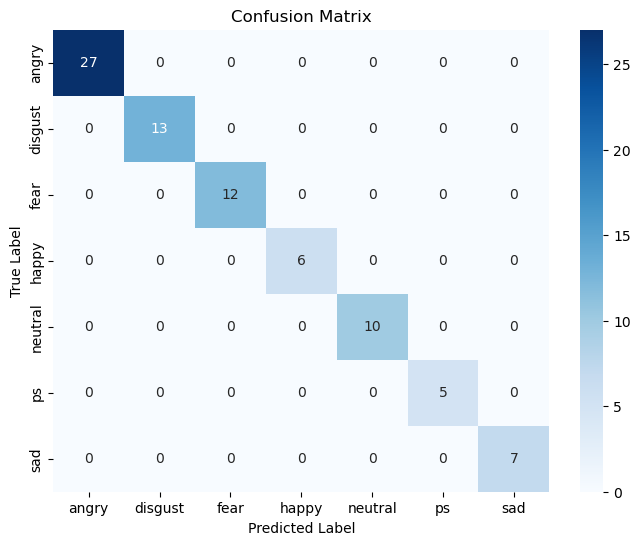

In [124]:
from sklearn.metrics import confusion_matrix
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

cm = confusion_matrix(actual_data, pred_data)

cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

>In this section, the code utilizes the `confusion_matrix` function from `sklearn.metrics` to create a confusion matrix based on the actual emotion labels (`actual_data`) and the predicted emotion labels (`pred_data`). The confusion matrix captures the number of samples predicted correctly and incorrectly for each emotion category.

Here's what the code does:

- `emotions`: This list contains the considered emotion categories, such as "angry," "disgust," "fear," "happy," "neutral," "ps," and "sad."

- `cm`: The `confusion_matrix` function calculates the matrix based on the true and predicted emotion labels, representing correct and incorrect predictions for each category.

- `cm_df`: The code converts the confusion matrix (`cm`) into a DataFrame, using emotion categories as both row and column indices, enhancing readability.

- Plotting: The code employs `sns.heatmap` from Seaborn to visualize the confusion matrix as a heatmap. `annot=True` adds numerical values within heatmap cells, while `fmt='d'` formats numbers as integers. The `cmap='Blues'` parameter sets the color palette for the heatmap.

By executing this code, you obtain a heatmap visually depicting the confusion matrix. The diagonal elements represent correct predictions for each emotion, while off-diagonal elements indicate misclassifications. Analyzing the heatmap offers insights into the model's performance for different emotions, guiding further improvements. This visualization aids in evaluating the speech emotion recognition model and refining strategies for enhanced accuracy.

###  Saving Predicted Emotions to CSV 

In [125]:
final_data.to_csv('prediction-emotion-label.csv', index=False)

In this segment, the code performs a crucial operation by storing the `final_data` DataFrame, which encompasses both the genuine and forecasted emotion labels for every test instance, into a CSV file named "prediction-emotion-label.csv."

Here's a breakdown of the code's functionality:

- `final_data.to_csv('prediction-emotion-label.csv', index=False)`: This line utilizes the `to_csv` method of the Pandas DataFrame (`final_data`) to export the data to a CSV file. The file name is specified as "prediction-emotion-label.csv." The `index=False` parameter ensures that the row indices are not included as a separate column in the CSV file.

By executing this code, the `final_data` DataFrame will be stored in a CSV file format. This file is valuable for sharing and in-depth analysis of the model's predictions and the corresponding genuine emotion labels. The CSV file will consist of two columns: "actual values," containing the real emotion labels, and "Predicted Values," containing the model's predicted emotion labels for each test sample. This file serves as a comprehensive resource for further scrutiny, reporting, or sharing the model's outcomes with various stakeholders.

# Conclusion

- Successfully developed a speech emotion recognition system using diverse datasets like Crema, Ravdess, Savee, and Tess.
- Conducted extensive data preprocessing, visualization, and augmentation to enhance dataset quality and diversity.
- Implemented feature extraction techniques and trained a Convolutional Neural Network (CNN) for accurate emotion classification.
- Demonstrated the interdisciplinary application of speech emotion recognition in human-computer interaction, mental health support, and customer sentiment analysis.
- Emphasized the importance of effective communication by documenting and visualizing model predictions in the "prediction-emotion-label.csv" file.
- Showcased the project's holistic approach, combining technical expertise with clear presentation, to unravel the complexities of human emotions.
- The project's success highlights the potential of speech emotion recognition in various real-world scenarios, reinforcing the importance of innovative data-driven solutions in understanding and interpreting human emotions.